In [1]:
!pip install Pillow
! git clone https://github.com/aimacode/aima-python.git
! pip install -r /content/aima-python/requirements.txt
%cd aima-python/
!git submodule init
!git submodule update
!pip install pytest
!pip install psutil
import sys
import os
py_file_location = "/content/aima-pyhton"
sys.path.append(os.path.abspath(py_file_location))

#!rm "utils.py"
#from google.colab import files
#upload = files.upload()

Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Total 5095 (delta 0), reused 0 (delta 0), pack-reused 5095
Receiving objects: 100% (5095/5095), 17.44 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (3418/3418), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.4 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=638853acb01b5d66f7c25efdf558ae00d1595cd1c240b599e52ad59bfd5892


Matrice non modificata



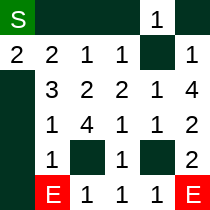




BFS



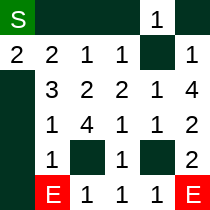

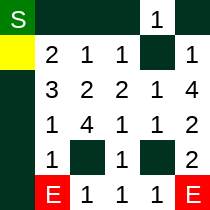

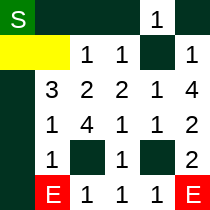

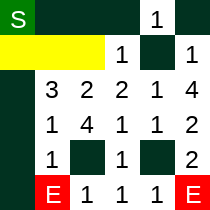

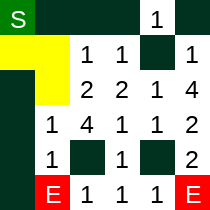

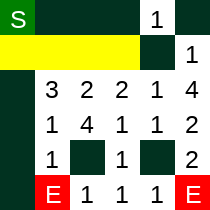

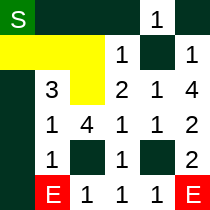

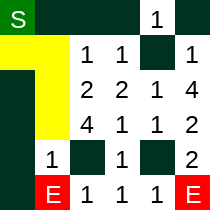

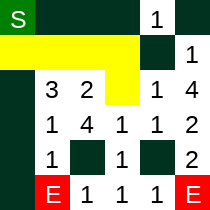

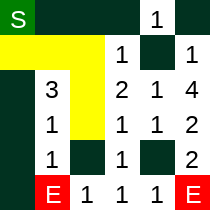

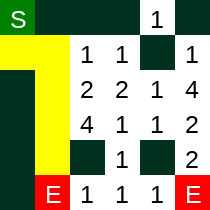

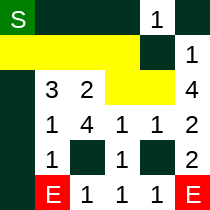

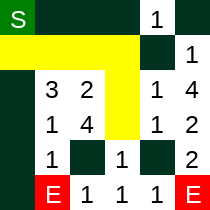

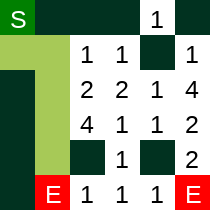


path [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
costo del cammino = 10
Elapsed time BFS:  0.2584153399999991

DFS



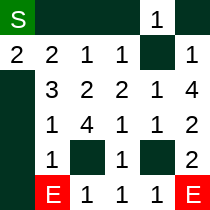

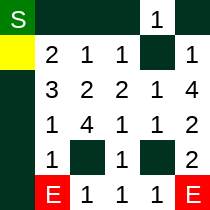

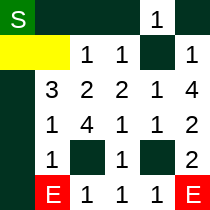

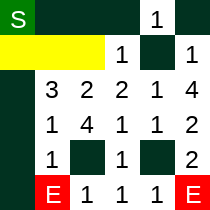

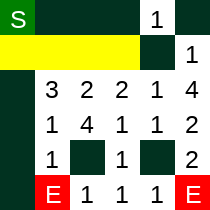

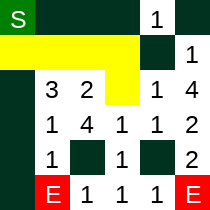

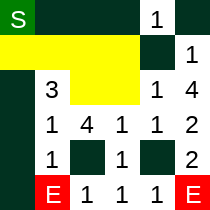

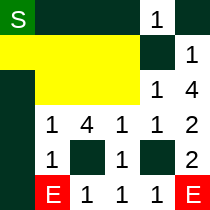

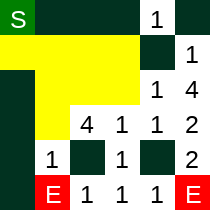

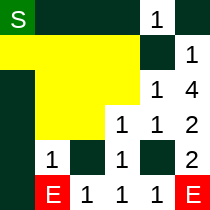

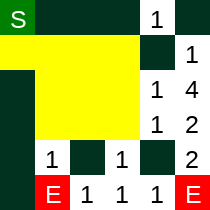

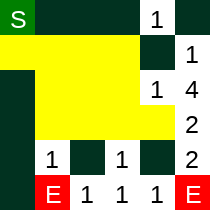

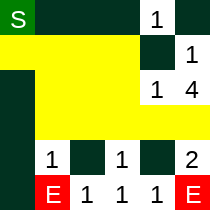

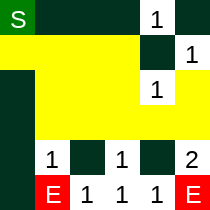

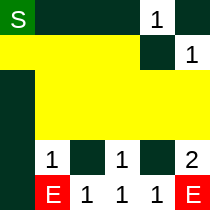

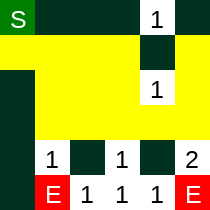

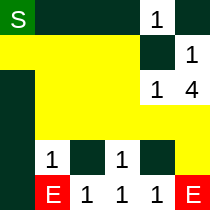

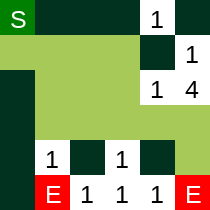


path [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]
costo del cammino = 25
Elapsed time DFS:  0.31580293199999687

Matrice modificata dividendola in base alle uscite presenti

Matrice numero: 1


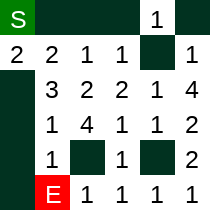



Matrice numero: 2


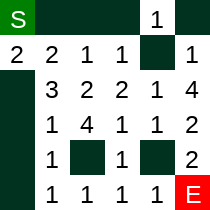




A* del percorso numero 1



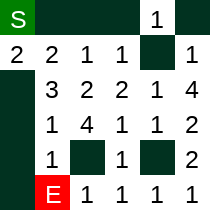

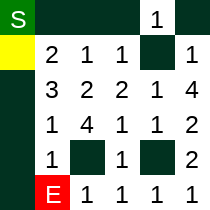

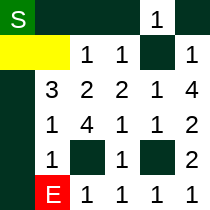

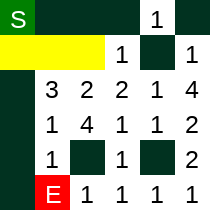

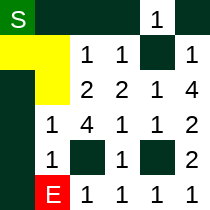

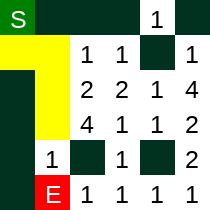

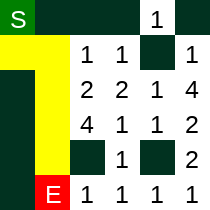

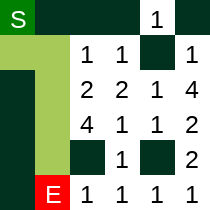


path [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
costo del cammino = 10
Elapsed time A*:  0.1658308599999998

A* del percorso numero 2



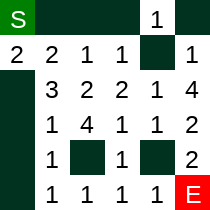

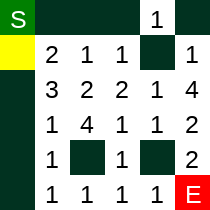

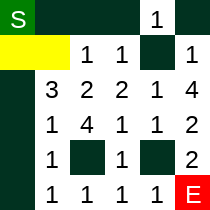

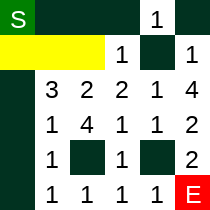

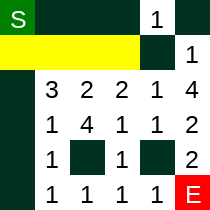

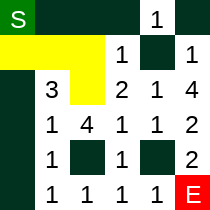

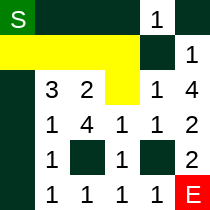

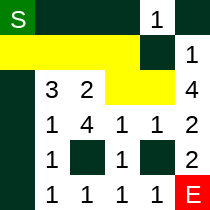

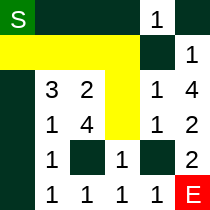

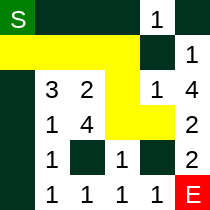

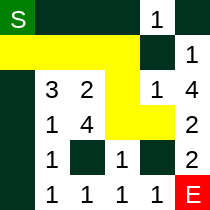

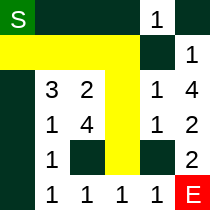

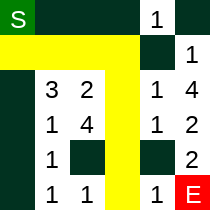

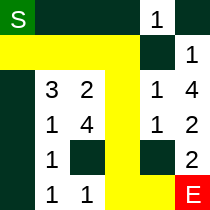

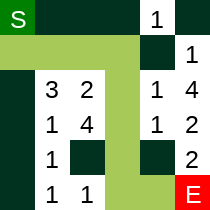


path [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5)]
costo del cammino = 13
Elapsed time A*:  0.28891178800000716

La migliore soluzione, cioè il path cost minore è : 10 nella/e matrice numero: 1  


A parità di costo possiamo controllare il tempo, in questo caso la migliore è: 1 con tempo: 0.1658308599999998


In [3]:
from search import *
from collections import *
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import copy
import timeit
import random
import psutil

# Returns a list of tuples as a path from the given start to the given end in the maze, and return the cost f
def astar(problem, start, goal, maze):

    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        # Print the path at the moment, for the search
        print_path(current_node,maze)

        # Found the goal
        if current_node.goal_test_node(goal):
            #print_path(current_node,maze)

            return current_node.path(), current_node.f # Return path and cost

        # Generate children
        children = []
        moves = current_node.result_node(current_node.actions_node())
        for move in moves:
            for pos in problem.cells:
                if pos.position == move[1]: # Find the right node to append
                    children.append(pos)

        # Loop through children
        for child in children:

            # Check if child is good to go
            bool = False

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    bool = True
                    break
            if bool:
                continue # Skip to the next child

            # Create the f, g, and h values
            g = current_node.g + child.weight
            h = manhattan_distance(child,goal)
            f = g + h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and g > open_node.g:
                    bool = True
                    break
            if bool:
                continue   # Skip to the next child

            child.g = g
            child.h = h
            child.f = f

            # Add the child to the open list and parent
            child.parent = current_node
            open_list.append(child)

    # No path found
    return None,-1

def manhattan_distance(start, goal):

  # Calculate the horizontal and vertical distances between the two nodes.
  # Return the sum of the two distances.
  return abs(start.position[0] - goal[0].position[0]) + abs(start.position[1] - goal[0].position[1])

def breadth_first_search(problem,start,goal):
    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    frontier = []
    reached = []
    frontier.append(start)
    while frontier:
        node = frontier.pop(0)
        print_path(node,maze)
        if node.goal_test_node(goal):

            return node.path(), node.g
        reached.append(node)
        # Generate children
        children = []
        moves = node.result_node(node.actions_node())
        for move in moves:
            for pos in problem.cells:
                if pos.position == move[1]: # Find the right node to append
                    children.append(pos)
        for child in children:
            if child not in reached:
                child.g = node.g + child.weight
                child.parent = node
                frontier.append(child)
                reached.append(child)
    return None,-1

def deep_first_search(problem,start,goal):
    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    discover = []
    # the functions doesn't return the node, so we have to find out who is the chosen one
    if deep_first_search_helper(problem,start,discover,goal):
      chosen = None
      flag = -1
      for g in goal:
        if len(g.path()) > flag:
          chosen = g
          flag = len(chosen.path())
      print_path(chosen,maze)
      return chosen.path(), chosen.g
    else:
      return None, -1
def deep_first_search_helper(problem,node,discover,goal):
    discover.append(node)
    if node.goal_test_node(goal):

      return True
    print_path(node,maze)
    children = []
    moves = node.result_node(node.actions_node())
    for move in moves:
        for pos in problem.cells:
            if pos.position == move[1]: # Find the right node to append
                children.append(pos)
    for child in children:
      if child not in discover:
        child.g = node.g + child.weight
        child.parent = node
        if deep_first_search_helper(problem,child,discover,goal):
          return True
    return False

# If the goal or the start are blocked in every direction, is uselss to run the algo
def check_block(start,goal):
  if not start.actions_node():
    return True
  i = 0
  for g in goal:
    if not g.actions_node():
      i = i + 1
  if i == len(goal):
    return True
  else:
    return False

# Get S and E from a matrix
def get_s_e(maze):
  print("MAZE")
  for row in maze:
    print(' '.join(row))
  i = 0
  j = 0
  for row in maze:
    for cell in row:
      if cell == "S":
        start = (i,j)
      elif cell == "E":
        end = (i,j)
      j = j + 1
    i = i + 1
    j = 0
  return start,end

class EasyMazeClass(Problem):

    def __init__(self, maze, row, col):
        self.cells = []
        self.start = None
        self.goal = []
        for i in range(row):
            for j in range(col):
                if maze[i][j] == "S":
                    self.start = EasyMaze(maze,None,(i,j))
                    self.cells.append(self.start)
                elif maze[i][j] == "E":
                    self.goal.append(EasyMaze(maze,None,(i,j)))
                    self.cells.append(self.goal[len(self.goal)-1])
                else:
                  self.cells.append(EasyMaze(maze,None,(i,j)))

    def goal_test(self, state):
       return state.goal_test_node(self.goal)

    def actions(self, state):
       return state.actions_node()

    def result(self, state, action):
       return state.result_node(action)

#    A class for the problem
class EasyMaze():

    # Constructor
    def __init__(self, maze, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
        self.letter = ""
        self.weight = self.set_weight_letter(maze)

    # Whenever we compare 2 nodes, with this function we compare the positions
    def __eq__(self, other):
        return self.position == other.position

    # Return the path of the node
    def path(self):
        path = []
        current = self
        while current is not None:
            path.append(current.position)
            current = current.parent
        return path[::-1]

    # Check if the node is the goal test
    def goal_test_node(self, end):
        for g in end:
          if self == g:
            return True
        return False

    # Get the weight of a node
    def set_weight_letter(self,maze):
        if maze[self.position[0]][self.position[1]] == "1":
            self.letter = "1"
            return 1
        if maze[self.position[0]][self.position[1]] == "2":
            self.letter = "2"
            return 2
        if maze[self.position[0]][self.position[1]] == "3":
            self.letter = "3"
            return 3
        if maze[self.position[0]][self.position[1]] == "4":
            self.letter = "4"
            return 4
        if maze[self.position[0]][self.position[1]] == "S":
            self.letter = "S"
            return 0
        if maze[self.position[0]][self.position[1]] == "E":
            self.letter = "E"
            return 1
        else:
            self.letter = "X"
            return 0

    # Returns the walkable direction from the node
    def actions_node(self):
        if self.letter == "X":
            return "No actions because this is a wall"
        moves = []
        for new_position in [[(0, -1),"Left"], [(0, 1),"Right"], [(-1, 0),"Up"], [(1, 0),"Down"]]: # Adjacent squares
            # Get node position, only up down left right
            node_position = (self.position[0] + new_position[0][0], self.position[1] + new_position[0][1]),new_position[1]
            # Make sure within range
            if node_position[0][0] > (len(maze) - 1) or node_position[0][0] < 0 or node_position[0][1] > (len(maze[len(maze)-1]) -1) or node_position[0][1] < 0:
                continue
            # Make sure walkable terrain
            if maze[node_position[0][0]][node_position[0][1]] == "X":
                continue
            moves.append(node_position[1])
        if moves: return moves; return None

    # Returns the letter and the coordinate of a movement
    def result_node(self, actions):
        result = []
        if not actions:
            return None
        for action in actions:
            for new_position in [[(0, -1),"Left"], [(0, 1),"Right"], [(-1, 0),"Up"], [(1, 0),"Down"]]:
                if action == new_position[1]:
                    node_position = (self.position[0] + new_position[0][0], self.position[1] + new_position[0][1])
                    result.append((maze[node_position[0]][node_position[1]],(node_position[0],node_position[1])))
        if result: return result; return None


# Print the path of a node from is parent with "-", also adding colors
def print_path(node,maze):
    path = node.path()
    maze_path = copy.deepcopy(maze)
    s_e = ["S","E"]
    for i in range(len(maze_path)):
        for j in range(len(maze_path[0])):
            if (i,j) in path and maze_path[i][j] not in s_e:
                maze_path[i][j] = "-"
    # Print without img, kinda trash
    # i = 0
    # j = 0
    # for row in maze:
    #   for cell in row:
    #       if (i,j) in path and cell not in s_e:
    #         print("\033[34m -\033[0m",end="") #blue
    #         maze_path[i][j] = "-"
    #       elif cell in s_e:
    #         print(" \033[32m"+str(cell)+"\033[0m",end="") #green
    #       elif cell == "X":
    #         print(" \033[31m"+str(cell)+"\033[0m",end="") #red
    #       else:
    #         print(" "+str(cell),end="") #white
    #       j = j + 1
    #   print()
    #   i = i + 1
    #   j = 0
    print()
    dimensione_pixel = 35
    # If this is the goal position
    flag = False
    if maze_path[node.position[0]][node.position[1]] == "E":
      flag = True
    img = draw_image(maze_path, dimensione_pixel,flag)
    display(img)

def draw_image(matrice, dimensione_pixel,flag):
    altezza = len(matrice)
    larghezza = len(matrice[0])
    # Create image
    img = Image.new("RGB", (larghezza * dimensione_pixel, altezza * dimensione_pixel), "white")
    draw = ImageDraw.Draw(img)
    #/usr/share/fonts/truetype
    # Set font and size
    font = ImageFont.truetype("LiberationSans-Regular.ttf", 25)
    char = ""
 # Change color of cell depending on letter
    for y in range(altezza):
        for x in range(larghezza):
            valore = matrice[y][x]
            char = valore
            if valore == "X":
              colore = "#013220" #dark green
              char = ""
            elif valore == "S":
              colore = "green"
            elif valore == "E":
              colore = "red"
            elif valore == "-":
              if flag == True:
                colore = "#a7c957" # light green
              else:
                colore = "yellow"
              char = ""
            else:
              colore = "white"
            draw.rectangle(
                [(x * dimensione_pixel, y * dimensione_pixel),
                 ((x + 1) * dimensione_pixel, (y + 1) * dimensione_pixel)],
                fill=colore
            )
            if char == "S" or char == "E":
              draw.text((10 + x * dimensione_pixel, 5 + y * dimensione_pixel), char, font = font,fill= "white",align ="center")
            else:
              draw.text((10 + x * dimensione_pixel, 5 + y * dimensione_pixel), char, font = font,fill= "black",align ="center")
            char = ""
    return(img)

# Generate matrix random with, X S E and  1-2-3-4, need to pass row and columns
def gen_matrix(size1, size2):
    array = []
    for i in range(size1):
      row = []
      for j in range(size2):
        if random.random() > 0.3:
          row.append(str(random.randint(1, 4)))
        else:
          row.append("X")
      array.append(row)

    #array = random_s_e(array,size2)
    array = random_s_e_border(array,size1,size2)

    return array

# Generate random S E that swaps X, not only on the bordes
def random_s_e(array,size2):
  x_index = []
  i = 0
  for row in array:
    count = size2 * i
    for index, element in enumerate(row):
      index = index + count
      if element == "X":
        x_index.append(index)
    i = i + 1

  swap = random.sample(x_index, 2)
  i = 0
  j = 0
  flag = []
  for row in array:
    count = size2 * i
    for index, element in enumerate(row):
      index = index + count
      if element == "X" and index in swap :
        if not flag:
          array[i][j] = random.choice(["S","E"])
          flag.append(array[i][j])
        elif "S" in flag:
          array[i][j] = "E"
        else:
          array[i][j] = "S"
      j = j + 1
    i = i + 1
    j = 0
  return array

# Generate S E only on the border of the maze
def random_s_e_border(array,size1,size2):
  #take only the border
  bord = []
  for i in (0,size1-1):
    for j in range(size2):
        bord.append((i,j))
        bord.append((j,i))
  #random position
  swap = random.sample(bord,2)
  i = 0
  j = 0
  flag = []
  for row in array:
    for cell in row:
      if (i,j) in swap:
        if not flag:
          array[i][j] = random.choice(["S","E"])
          flag.append(array[i][j])
        elif "S" in flag:
            array[i][j] = "E"
        else:
            array[i][j] = "S"
      j = j + 1
    i = i + 1
    j = 0
  return array

# Generate more matrix at once, return to array
def gen_more_matrix(n,size1,size2):
  array = []
  for i in range(n):
    array.append(gen_matrix(size1,size2))
  print()
  for arra in array:
    for row in arra:
      print(' '.join(row))
  return array

def fix_maze(maze):
  i = 0
  j = 0
  pos = []
  start = (0,0)
  # Search all the E
  for row in maze:
    for cell in row:
      if cell == "E":
        pos.append((i,j))
      if cell == "S": # Also take the position of S
        start = (i,j)
      j = j + 1
    i = i + 1
    j = 0
  # Check if there are more E
  if len(pos) >  1:
    check = []
    # Append all the Manhattan distance calculate from every E
    for p in pos:
      check.append(abs(start[0] - p[0]) +abs(start[1] - p[1]))
    # Take the position of the min of check, and on that position put -1, this is the only E is gonna remain
    check[check.index(min(check))] = -1
    c = 0
    i = 0
    j = 0
    for row in maze:
      for cell in row:
        if cell == "E":
# Insert X inside every cell with E, only if the check is not equal to -1
          if check[c] != -1:
            maze[i][j] = "X"
          c = c + 1
        j = j + 1
      i = i + 1
      j = 0
  if len(pos) == 0:
    sys.exit("NO E INSIDE MAZE")

# Use this function to divide the matrix into several matrices according to the number of E's inside, each will have only 1 "E"
def divide_matrix(matrix):
    count_e = sum(row.count('E') for row in matrix)
    result = []

    if count_e == 1 or count_e == 0:
        # If only 1 "E", return the original matrix
        return [matrix]

    # Get the position in the matrix of every "E"
    e_indices = [(i, j) for i, row in enumerate(matrix) for j, val in enumerate(row) if val == "E"]

    for i in range(count_e):
        new_matrix = [row[:] for row in matrix]
        for row in new_matrix:
            # Set all the "E" to "1"
            for j in range(len(row)):
                if row[j] == 'E':
                    row[j] = "1"
        # Get the right position and put "E" on it
        e_index = e_indices[i]
        new_matrix[e_index[0]][e_index[1]] = 'E'
        result.append(new_matrix)

    return result

def manhattan_fix():
    print("\nMatrice modificata prendendo uscita più vicina all'ingresso\n")
    fix_maze(maze)
    pfix = EasyMazeClass(maze, len(maze),len(maze[0]))
    dimensione_pixel = 35
    img = draw_image(maze, dimensione_pixel,False)
    display(img)
    print("\n")

    print("A*")
    start_time = timeit.default_timer()
    path, cost = astar(pfix, pfix.start, pfix.goal,maze)
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))

    end_time = timeit.default_timer()
    print("Elapsed time A*: ", end_time - start_time)

def divide_fix(m):
  i = 0
  print("\nMatrice modificata dividendola in base alle uscite presenti\n")
  list_matrix = divide_matrix(m)
  problem_split = []
  for matrix in list_matrix:
    problem_split.append(EasyMazeClass(matrix, len(matrix),len(matrix[0])))
    dimensione_pixel = 35
    img = draw_image(matrix, dimensione_pixel,False)
    print("Matrice numero: "+str(i+1))
    display(img)
    print("\n")
    i = i + 1
  i = 0
  all = []
  for pfix in problem_split:
    print("\nA* del percorso numero "+str(i+1))
    start_time = timeit.default_timer()
    path, cost = astar(pfix, pfix.start, pfix.goal,list_matrix[i])
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))
    end_time = timeit.default_timer()
    all.append([i+1,cost,path,end_time - start_time])
    print("Elapsed time A*: ", end_time - start_time)
    i = i + 1
  return all

def check_usage():
  print("\nUtilizzo:")
  cpu_percent = psutil.cpu_percent(interval=1)
  memory_usage = psutil.virtual_memory()
  disk_usage = psutil.disk_usage('/')
  print(f"CPU Usage: {cpu_percent}%")
  print(f"Memory Usage: {memory_usage.percent}%")
  print(f"Disk Usage: {disk_usage.percent}%")

if __name__ == '__main__' :
    sys.setrecursionlimit(5000)

    maze = [
        ["S", "X", "X", "X", "1", "X"],
        ["2", "2", "1", "1", "X", "1"],
        ["X", "3", "2", "2", "1", "4"],
        ["X", "1", "4", "1", "1", "2"],
        ["X", "1", "X", "1", "X", "2"],
        ["X", "E", "1", "1", "1", "E"],]
    #maze = gen_matrix(10,10)
    #print(maze)
    print("\nMatrice non modificata\n")
    problem = EasyMazeClass(maze, len(maze),len(maze[0]))

    dimensione_pixel = 35
    img = draw_image(maze, dimensione_pixel,False)
    display(img)
    print("\n")

    print("\nBFS")
    start_time = timeit.default_timer()
    path, cost= breadth_first_search(problem,problem.start,problem.goal)
    #print_path(problem.goal)
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))
    end_time = timeit.default_timer()
    print("Elapsed time BFS: ", end_time - start_time)

    print("\nDFS")
    start_time = timeit.default_timer()
    path, cost= deep_first_search(problem,problem.start,problem.goal)
    #print_path(problem.goal)
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))
    end_time = timeit.default_timer()
    print("Elapsed time DFS: ", end_time - start_time)

    #manhattan_fix()
    # All is (num problem, path cost, path, time)
    all = divide_fix(maze)
    try:
      best_cost = min(i[1] for i in all if i[1] >= 0)
      last = []
      for row in all:
        if row[1] == best_cost:
          last.append(row)
      print("\nLa migliore soluzione, cioè il path cost minore è : "+ str(best_cost)+" nella/e matrice numero: ",end="")
      for i in last:
        print(str(i[0])+"  ",end="")
      print("\n\n")
      best_time = min(i[3] for i in last)
      fin = 0
      for row in last:
        if row[3] == best_time:
          fin = row[0]
      print("A parità di costo possiamo controllare il tempo, in questo caso la migliore è: "+ str(fin)+ " con tempo: "+str(best_time))
    except:
      print("Non esiste un path")